<a href="https://colab.research.google.com/github/hkaragah/google_colab_repo/blob/main/hands_on_ml_exercises/07_ensemble_learning_Feature_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensamble Learning: Feature Importance

__Disclaimer:__ This exercise is adopted from `"Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow (Third Edition)"` book written by `_Aurelien Geron_` publoshed by `_O'Reilly_`. I broke them down into smaller digestable snippets, made some modifications, and added some explanations so that I can undersatand them better. The porpuse of this notebook is just for me to understand the concept and have hands-on practice while reading the book material.

## Objective
Apply random forest classifier to measure the relative importance of features

## Load Dataset

In [63]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, fetch_openml

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import StandardScaler

from graphviz import Source
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import seaborn as sns
from copy import deepcopy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.inspection import permutation_importance

from IPython.display import Image
import time


## Iris Dataset

In [22]:
iris = load_iris(as_frame=True)
iris.data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

There are four columns (features) in the dataset. Let's use random forest classifier to find the relative importance of them.

In [42]:
rfc_iris = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rfc_iris.fit(iris.data, iris.target)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [43]:
rfc_iris_df = pd.DataFrame({'Feature': iris.data.columns, 'Importance': rfc.feature_importances_}).sort_values(by='Importance', ascending=False)
rfc_iris_df

,Feature,Importance
2,petal length (cm),0.441030
3,petal width (cm),0.423358
0,sepal length (cm),0.112492
1,sepal width (cm),0.023119


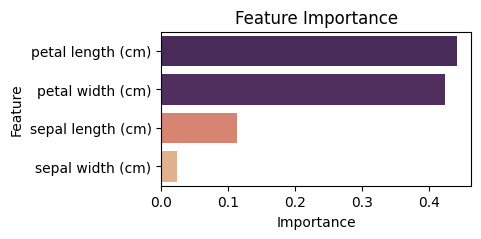

In [44]:
plt.figure(figsize=(4, 2))
sns.barplot(x='Importance', y='Feature', data=rfc_iris_df, palette='flare', hue='Importance', legend=False)
plt.title('Feature Importance')
plt.show()

The most important features are petal length and width.

## Feature Importance

According to the documentation [[1](#1)], is the impurity-based feature importance (aka. Gini importance). The higher its value, the more important the feature. It is computed as the normalized total reduction of the criterion brought by that feature. It measures the average impurity (gini or entropy) reduction of the tree nodes across all tress in the forest as a result of a feature.<br>

Note that _impurity-based_ feature importance can be misleading forhigh cardinality features (many unique values usch as zip codes). Alternatively, `sklearn.inspection.permutation_importance` can be used.[[2](#2)]<br>

## Permutation Importance

Permutation importance is an alternative method that evaluates feature importance by measuring the effect on model performance (e.g., accuracy) when the values of a feature are randomly shuffled. This method is less likely to be biased by high cardinality because it directly measures how much the model's performance drops when the feature's relationship with the target is broken.<br>

If a high cardinality feature, such as Zip Code, gets shuffled, and the model's performance doesn't change much, it indicates that the feature wasn't actually important for making predictions. This gives a more accurate picture of feature importance.

Per documentation [[2](#2)], "__Permutation feature importance__ is a model inspection technique that measures the contribution of each feature to a fitted model's statistical performance on a given tabular dataset. This technique is particularly useful for non-linear or opaque estimators, and involves randomly shuffling the values of a single feature and observing the resulting degradation of the model's score. By breaking the relationship between the feature and the target, we determine how much the model relies on such particular feature."<br>

Here is the outline of the algorithm per documentation:

* Inputs: fitted predictive model $m$, tabular dataset (training or validation).

* Compute the reference score $s$ of the model $m$ on data $D$ (for instance the accuracy for a classifier or the $R^2$ for a regressor).

* For each feature $j$ (column of $D$):
  * For each repetition $k$ in $1,...,K$:
    * Randomly shuffle column $j$ of dataset $D$ to generate a corrupted version of the data named $\tilde{D}_{k,j}$.
    * Compute the score $s_{k,j}$ of model $m$ on corrupted data $\tilde{D}_{k,j}$.
  * Compute importance $i_j$ for feature $f_j$ defined as:

$$i_j = s - \frac{1}{K}\sum_{k=1}^{K}s_{k,j}$$




In [45]:
iris_perm = permutation_importance(rfc_iris, iris.data, iris.target, n_repeats=5, random_state=42, n_jobs=-1)
iris_perm_df = pd.DataFrame({'Feature': iris.data.columns, 'Importance': iris_perm.importances_mean}).sort_values(by='Importance', ascending=False)
iris_perm_df

,Feature,Importance
2,petal length (cm),0.352000
3,petal width (cm),0.133333
0,sepal length (cm),0.013333
1,sepal width (cm),0.012000


## Wine Dataset

In [25]:
wine = load_wine(as_frame=True)
wine.data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [36]:
wine.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

There area total of 13 columns. Let's use random forest to compute their relative importance.

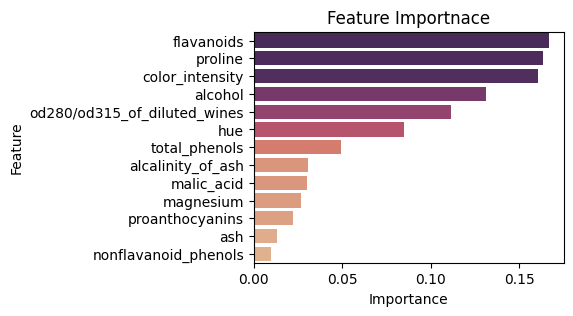

In [37]:
rfc_wine = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rfc_wine.fit(wine.data, wine.target)
rfc_wine_df = pd.DataFrame({'Feature': wine.data.columns, 'Importance': rfc_wine.feature_importances_}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(4, 3))
sns.barplot(x='Importance', y='Feature', data=rfc_wine_df, palette='flare', hue='Importance', legend=False)
plt.title('Feature Importnace')
plt.show()

The top three important features are 'flavanoids', 'proline', and 'color_intensity'.

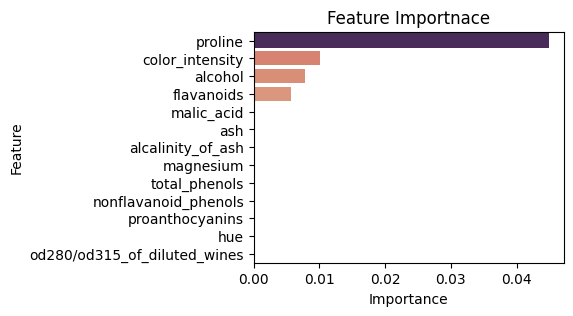

In [46]:
# Permutation Importance approach
wine_perm = permutation_importance(rfc_wine, wine.data, wine.target, n_repeats=5, random_state=42, n_jobs=-1)
wine_perm_df = pd.DataFrame({'Feature': wine.data.columns, 'Importance': wine_perm.importances_mean}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(4, 3))
sns.barplot(x='Importance', y='Feature', data=wine_perm_df, palette='flare', hue='Importance', legend=False)
plt.title('Feature Importnace')
plt.show()

In [58]:
len(wine.data['flavanoids'].unique())

132

In [59]:
len(wine.data['flavanoids'])

178

Although 'flavanoid' feature is of medium cardinality (only 132 out of 178 are unique), computing the feature miportance using permutation importance approach (`sklearn.inspection.permutation_importance`) resulted in removing that from the top of the list of the most important features.

## Breast Cancer Dataset

In [38]:
bc = load_breast_cancer(as_frame=True)
bc.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

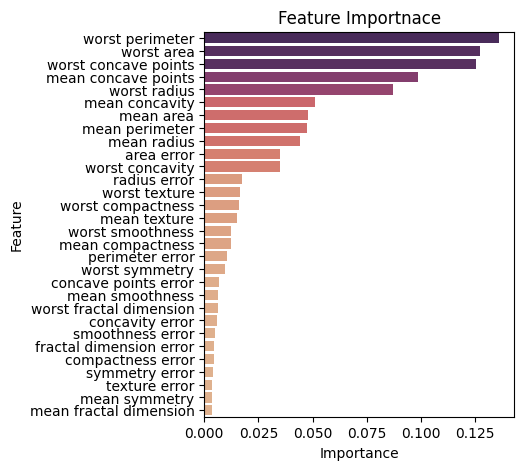

In [62]:
rfc_bc = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rfc_bc.fit(bc.data, bc.target)

rfc_bc_df = pd.DataFrame({'Feature': bc.data.columns, 'Importance': rfc_bc.feature_importances_}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(4, 5))
sns.barplot(x='Importance', y='Feature', data=rfc_bc_df, palette='flare', hue='Importance', legend=False)
plt.title('Feature Importnace')
plt.show()

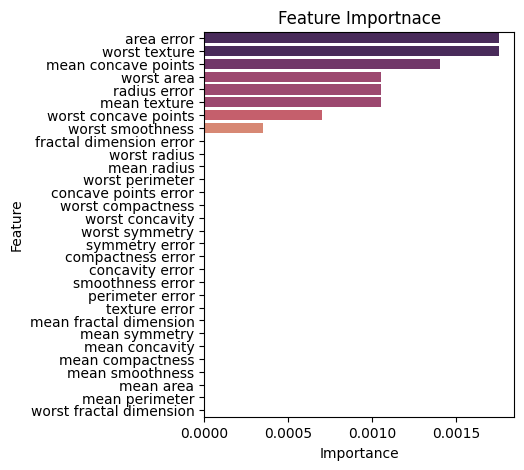

In [61]:
# Permutation Importance approach
bc_perm = permutation_importance(rfc_bc, bc.data, bc.target, n_repeats=5, random_state=42, n_jobs=-1)
bc_perm_df = pd.DataFrame({'Feature': bc.data.columns, 'Importance': bc_perm.importances_mean}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(4, 5))
sns.barplot(x='Importance', y='Feature', data=bc_perm_df, palette='flare', hue='Importance', legend=False)
plt.title('Feature Importnace')
plt.show()

## MNIST Dataset

The features in this dataset are the pixels. I use the `feature_importance_` of random forest to rank the pixel based on their impotance in classification.

In [65]:
X_mnist, y_mnist = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, parser='auto')

rf_mnist = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rf_mnist.fit(X_mnist, y_mnist)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [67]:
rf_mnist.feature_importances_.shape

(784,)

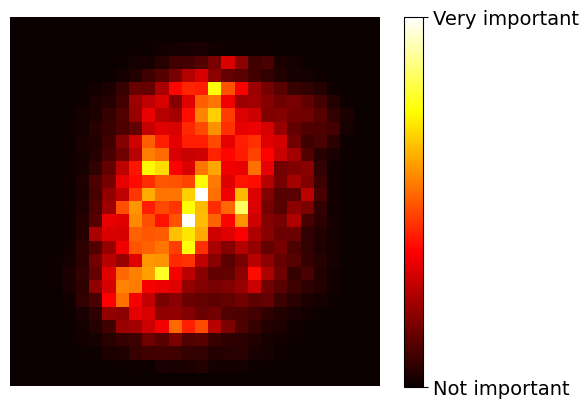

In [71]:
heatmap_image = rf_mnist.feature_importances_.reshape(28, 28)
plt.imshow(heatmap_image, cmap="hot")
cbar = plt.colorbar(ticks=[rf_mnist.feature_importances_.min(),
                           rf_mnist.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'], fontsize=14)
plt.axis("off")
plt.show()

## References:
1. <a id='1' href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_'>Scikit-Learn: Random Forest Classifier</a>

2. <a id='2' href='https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance'>Scikit-Learn: permutation_importance</a>